In [1]:
# import libraries
import json
import math
import os
from glob import glob 
from tqdm import tqdm
from PIL import Image
import cv2 # image processing
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization


from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

from keras import layers
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.applications import VGG16,VGG19
from keras.utils.np_utils import to_categorical
from keras.layers import  Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator,image,img_to_array,load_img

Using TensorFlow backend.


In [2]:
input_path = "../input/chest-xray-pneumonia/chest_xray/"
train_path = input_path +"train/"
test_path = input_path +"test/"
val_path = input_path +"val/"

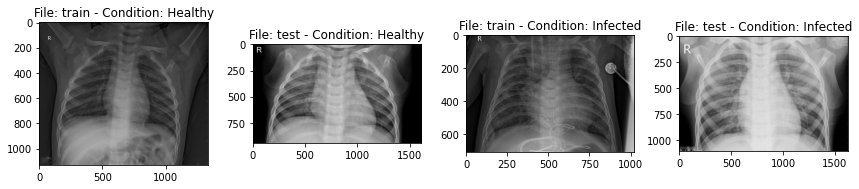

In [3]:
fig, ax = plt.subplots(1,4, figsize=(12,12))
ax = ax.ravel()
plt.tight_layout()
for i, _set in enumerate(['train', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/NORMAL/'+os.listdir(set_path+'/NORMAL')[0]),cmap='gray')
    ax[i].set_title('File: {} - Condition: Healthy'.format(_set))
    ax[i+2].imshow(plt.imread(set_path+'/PNEUMONIA/'+os.listdir(set_path+'/PNEUMONIA')[0]),cmap='gray')
    ax[i+2].set_title('File: {} - Condition: Infected'.format(_set))

In [4]:
# Data Augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [5]:
# Create Model with KERAS library
model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu",padding="same",input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation="relu",padding="same"))
model.add(Conv2D(64, (3,3), activation="relu",padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation="relu",padding="same"))
model.add(Conv2D(128, (3,3), activation="relu",padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, (3,3), activation="relu",padding="same"))
model.add(Conv2D(256, (3,3), activation="relu",padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, (3,3), activation="relu",padding="same"))
model.add(Conv2D(256, (3,3), activation="relu",padding="same"))
model.add(Conv2D(256, (3,3), activation="relu",padding="same"))
model.add(Conv2D(256, (3,3), activation="relu",padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1000, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 128)      

In [6]:
# Compile Mode
model.compile(loss='binary_crossentropy',
              optimizer= Adam(lr=0.0001),
              metrics=['acc'])

In [7]:
# Fit Model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=500,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10
)

Epoch 1/20
500/500 [==============================] - 188s 376ms/step - loss: 0.5640 - acc: 0.7386 - val_loss: 0.6501 - val_acc: 0.6350
Epoch 2/20
500/500 [==============================] - 150s 301ms/step - loss: 0.3664 - acc: 0.8163 - val_loss: 0.5681 - val_acc: 0.7100
Epoch 3/20
500/500 [==============================] - 154s 308ms/step - loss: 0.2831 - acc: 0.8745 - val_loss: 0.1996 - val_acc: 0.8850
Epoch 4/20
500/500 [==============================] - 154s 309ms/step - loss: 0.2523 - acc: 0.8916 - val_loss: 0.3852 - val_acc: 0.8478
Epoch 5/20
500/500 [==============================] - 150s 300ms/step - loss: 0.2116 - acc: 0.9124 - val_loss: 0.3148 - val_acc: 0.8650
Epoch 6/20
500/500 [==============================] - 153s 306ms/step - loss: 0.1807 - acc: 0.9251 - val_loss: 0.3064 - val_acc: 0.9550
Epoch 7/20
500/500 [==============================] - 154s 309ms/step - loss: 0.1780 - acc: 0.9295 - val_loss: 0.1989 - val_acc: 0.9076
Epoch 8/20
500/500 [============================

In [10]:
# model save
model.save("cnn-example-pneumonia-vgg19.h5")

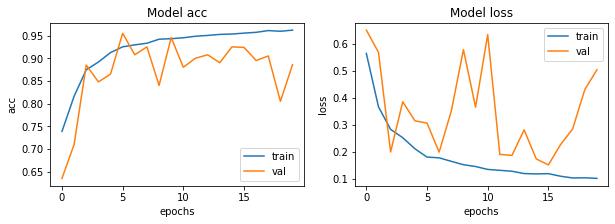

In [9]:
# Visualize Loss and Accuracy Rates
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['acc', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])